In [ ]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [ ]:
%precision 3
pd.options.display.precision = 3

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
os.listdir()

In [ ]:
df = pd.read_csv('https://bit.ly/Used_Cars_Price')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
cols = ['MetColor', 'Automatic']
df[cols]

In [ ]:
df[cols] = df[cols].astype(str)

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.sort_values(by = ['KM']).head()

In [ ]:
df = df[df['KM'].gt(1)]

In [ ]:
df.shape[0]

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.describe(include = object)

In [ ]:
df['FuelType'].value_counts().sort_index()

In [ ]:
df['FuelType'].value_counts(normalize = True).sort_index() * 100

In [ ]:
# C:\Users\hdsce\Venv에 저장한 py 모듈 호출
from GraphicSetting import *

In [ ]:
import HelloDataScience as hds

In [ ]:
df['Price'].describe()[['min', 'max']]

In [ ]:
sns.histplot(data = df, x = 'Price', 
             binwidth = 1000, binrange = (4000, 16000),
             color = 'orange')
plt.title(label = '중고차 가격 분포');

In [ ]:
sns.boxplot(data = df, y = 'Price', color = 'orange');

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'Price', ci = None, 
            scatter_kws = {'color': '0.8', 's': 15, 'alpha': 0.5}, 
            line_kws = {'color': 'red', 'lw': 1.5});

In [ ]:
hds.plot_regression(data = df, x = 'Age', y = 'Price')

In [ ]:
hds.plot_regression(data = df, x = 'KM', y = 'Price')
plt.axvline(x = 100000, color = 'red', lw = 1.5);

In [ ]:
hds.plot_regression(data = df, x = 'HP', y = 'Price')

In [ ]:
hds.plot_regression(data = df, x = 'CC', y = 'Price')

In [ ]:
hds.plot_regression(data = df, x = 'Doors', y = 'Price')

In [ ]:
df['Doors'].value_counts().sort_index()

In [ ]:
hds.plot_regression(data = df, x = 'Weight', y = 'Price')
plt.axvline(x = 1250, color = 'red', lw = 0.5, ls = '--');

In [ ]:
hds.plot_box_group(data = df, x = 'FuelType', y = 'Price', 
                   pal = ['0.6', '0.8', '1'])

In [ ]:
hds.plot_box_group(data = df, x = 'MetColor', y = 'Price')

In [ ]:
hds.plot_box_group(data = df, x = 'Automatic', y = 'Price')

In [ ]:
df = df[df['Doors'].ne(2) & df['Weight'].le(1250)]

In [ ]:
df.shape[0]

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.to_excel('Used_Cars_Price.xlsx', index = None)
df.to_csv('Used_Cars_Price.csv', index = None)
joblib.dump(value = df, filename = 'Used_Cars_Prics.z')

In [ ]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [ ]:
%precision 3
pd.options.display.precision = 3

In [ ]:
from scipy import stats
from statsmodels import robust

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
os.listdir()

In [ ]:
df = pd.read_excel('Used_Cars_Price.xlsx')

In [ ]:
df.info()

In [ ]:
df = joblib.load('Used_Cars_Prics.z')

In [ ]:
df.info()

In [ ]:
df['Price'].mean()

In [ ]:
stats.trim_mean(df['Price'], 0.1)

In [ ]:
df['Price'].median()

In [ ]:
stats.trim_mean(df['Price'], 0.5)

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 100+1))

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 10+1))

In [ ]:
df['Price'].quantile(np.linspace(0, 1, 4+1))

In [ ]:
df['Price'].max()

In [ ]:
df['Price'].min()

In [ ]:
df['Price'].max() - df['Price'].min()

In [ ]:
df['Price'].quantile([0, 1])

In [ ]:
df['Price'].quantile([0, 1]).diff().iloc[-1]

In [ ]:
df['Price'].quantile([0.25, 0.75]).diff().iloc[-1]

In [ ]:
df['FuelType'].mode()

In [ ]:
df['FuelType'].value_counts()

In [ ]:
df['FuelType'].value_counts().sort_index()

In [ ]:
df['FuelType'].value_counts(normalize = True)

In [ ]:
df['Price'].var()

In [ ]:
df['Price'].var() ** (1/2)

In [ ]:
df['Price'].std()

In [ ]:
robust.mad(df['Price'])

In [ ]:
%precision 3

In [ ]:
pd.options.display.precision = 3

In [ ]:
df.mean(numeric_only = True)

In [ ]:
df.apply('mean', numeric_only = True, axis = 0)

In [ ]:
df.std(numeric_only = True)

In [1]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
%precision 3
pd.options.display.precision = 3

In [3]:
from scipy import stats
from statsmodels import robust

from GraphicSetting import *
import HelloDataScience as hds

In [16]:
np.random.seed(1234)

In [17]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 5000)

In [18]:
heights

array([177.357, 169.045, 182.164, ..., 183.044, 184.976, 175.166])

In [19]:
heights.mean()

175.121

In [20]:
heights.std()

4.959

In [23]:
stats.norm.pdf(x = 175, loc = 175, scale = 15) * 1000000

26596.152

In [24]:
stats.norm.pdf(x = 175, loc = 175, scale = 10) * 1000000

39894.228

In [25]:
stats.norm.pdf(x = 175, loc = 175, scale = 5) * 1000000

79788.456

In [26]:
x = np.arange(130, 220, 0.1)
y1 = stats.norm.pdf(x = x, loc = 175, scale = 15)
y2 = stats.norm.pdf(x = x, loc = 175, scale = 10)
y3 = stats.norm.pdf(x = x, loc = 175, scale = 5)

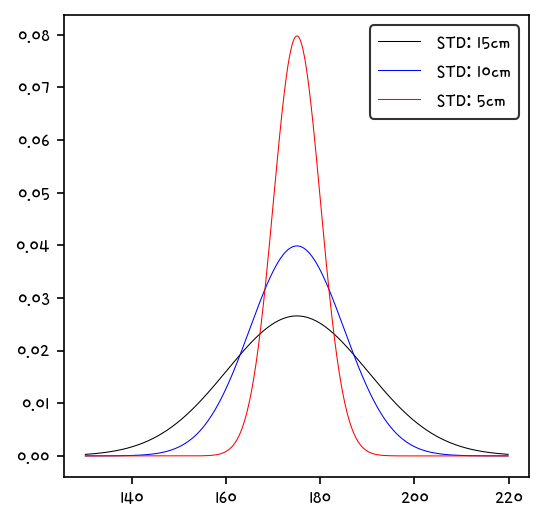

In [28]:
sns.lineplot(x = x, y = y1, label = 'STD: 15cm', color = 'black')
sns.lineplot(x = x, y = y2, label = 'STD: 10cm', color = 'blue')
sns.lineplot(x = x, y = y3, label = 'STD: 5cm', color = 'red');

In [29]:
stats.norm.cdf(x = 185, loc = 175, scale = 15)

0.748

In [30]:
stats.norm.cdf(x = 185, loc = 175, scale = 10)

0.841

In [31]:
stats.norm.cdf(x = 185, loc = 175, scale = 5)

0.977

In [32]:
stats.norm.cdf(x = [170, 180], loc = 175, scale = 5)

array([0.159, 0.841])

In [35]:
np.diff(stats.norm.cdf(x = [170, 180], loc = 175, scale = 5))[0]

0.683

In [36]:
np.diff(stats.norm.cdf(x = [180, 185], loc = 175, scale = 5))[0]

0.136

In [37]:
stats.norm.ppf(q = 0.748, loc = 175, scale = 15)

185.023

In [38]:
stats.norm.ppf(q = 0.841, loc = 175, scale = 10)

184.986

In [39]:
stats.norm.ppf(q = 0.977, loc = 175, scale = 5)

184.977

In [40]:
stats.norm.ppf(q = 0.95, loc = 175, scale = 5)

183.224

In [41]:
stats.norm.ppf(q = 0.99, loc = 175, scale = 5)

186.632

In [43]:
1 - stats.norm.cdf(x = 170, loc = 163, scale = 5)

0.081

In [44]:
stats.norm.ppf(q = 0.99, loc = 163, scale = 5)

174.632

In [47]:
np.diff(stats.norm.cdf(x = [185, 215], loc = 200, scale = 15))

array([0.683])

In [48]:
stats.skew(heights)

-0.037

In [49]:
stats.kurtosis(heights)

-0.071

In [50]:
stats.shapiro(heights)

ShapiroResult(statistic=0.9995919466018677, pvalue=0.396047443151474)

In [51]:
np.random.seed(1234)

In [52]:
heights = stats.norm.rvs(loc = 175, scale = 5, size = 10000)

In [53]:
stats.shapiro(heights)

C:\Users\hdsce\Venv\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9996193051338196, pvalue=0.04346244037151337)

In [54]:
stats.anderson(heights)

AndersonResult(statistic=0.35265258232357155, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [55]:
def scale(x, loc, scale):
    return (x - loc) / scale

In [56]:
scale(x = 185, loc = 175, scale = 15)

0.667

In [57]:
scale(x = 185, loc = 175, scale = 10)

1.000

In [58]:
scale(x = 185, loc = 175, scale = 5)

2.000

In [59]:
scale(x = 90, loc = 75, scale = 15)

1.000

In [60]:
scale(x = 55, loc = 40, scale = 10)

1.500

In [61]:
stats.zscore(heights)

array([ 0.458, -1.213,  1.423, ..., -1.074, -0.516, -0.273])

In [62]:
stats.zscore(heights) > 3

array([False, False, False, ..., False, False, False])

In [63]:
stats.zscore(heights) < -3

array([False, False, False, ..., False, False, False])

In [64]:
np.abs(stats.zscore(heights)) > 3

array([False, False, False, ..., False, False, False])

In [66]:
locs = np.where(np.abs(stats.zscore(heights)) > 3)

(array([  81, 1307, 1333, 1670, 2053, 2289, 3136, 3924, 4097, 4477, 4599,
        5274, 5903, 5935, 7040, 7340, 7510, 7743, 8578, 8650, 9406, 9888],
       dtype=int64),)

In [67]:
heights[locs]

array([157.182, 190.628, 190.548, 155.596, 158.613, 191.103, 158.832,
       157.826, 160.072, 159.918, 159.246, 158.679, 157.003, 160.031,
       158.681, 160.142, 159.258, 191.439, 158.343, 155.707, 190.188,
       159.739])

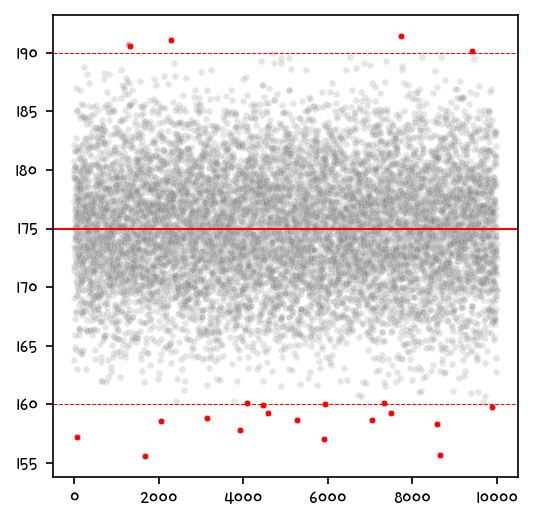

In [79]:
sns.scatterplot(x = range(10000), y = heights, s = 10, color = '0.5', alpha = 0.2)
for i in locs:
    sns.scatterplot(x = i, y = heights[i], s = 10, color = 'red')

plt.axhline(y = 175, color = 'red', lw = 1, ls = '-')
plt.axhline(y = 190, color = 'red', lw = 0.5, ls = '--')
plt.axhline(y = 160, color = 'red', lw = 0.5, ls = '--');

In [80]:
scaled = stats.zscore(heights)

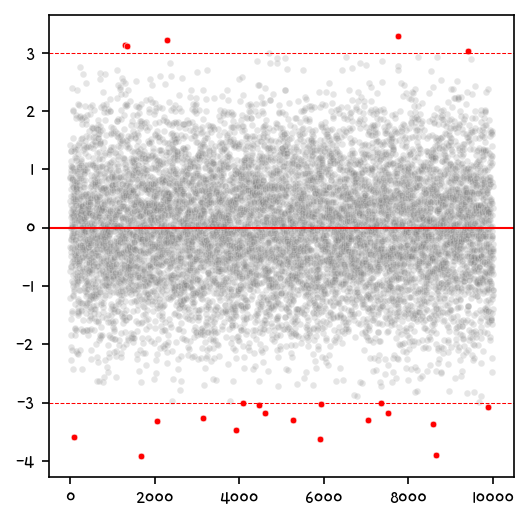

In [83]:
sns.scatterplot(x = range(10000), y = scaled, s = 10, color = '0.5', alpha = 0.2)
for i in locs:
    sns.scatterplot(x = i, y = scaled[i], s = 10, color = 'red')

plt.axhline(y = 0, color = 'red', lw = 1, ls = '-')
plt.axhline(y = 3, color = 'red', lw = 0.5, ls = '--')
plt.axhline(y = -3, color = 'red', lw = 0.5, ls = '--');

In [85]:
med = np.median(heights)
mad = robust.mad(heights)

In [89]:
locs = np.where(np.abs((heights - med) / mad) > 3)
locs

(array([  81, 1307, 1333, 1670, 2053, 2289, 2404, 3136, 3780, 3924, 4097,
        4477, 4599, 4712, 5274, 5903, 5935, 7040, 7340, 7510, 7743, 8578,
        8650, 9406, 9678, 9888], dtype=int64),)